In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [6]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [7]:
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [8]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0.0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1.0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1.0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0.0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0.0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0.0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0.0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1.0


In [11]:
def correlation(dataset,threshold):
    correlation_matrix = dataset.corr()
    set1=set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                colname = correlation_matrix.columns[i]
                set1.add(colname)
    return set1            
    

<Axes: >

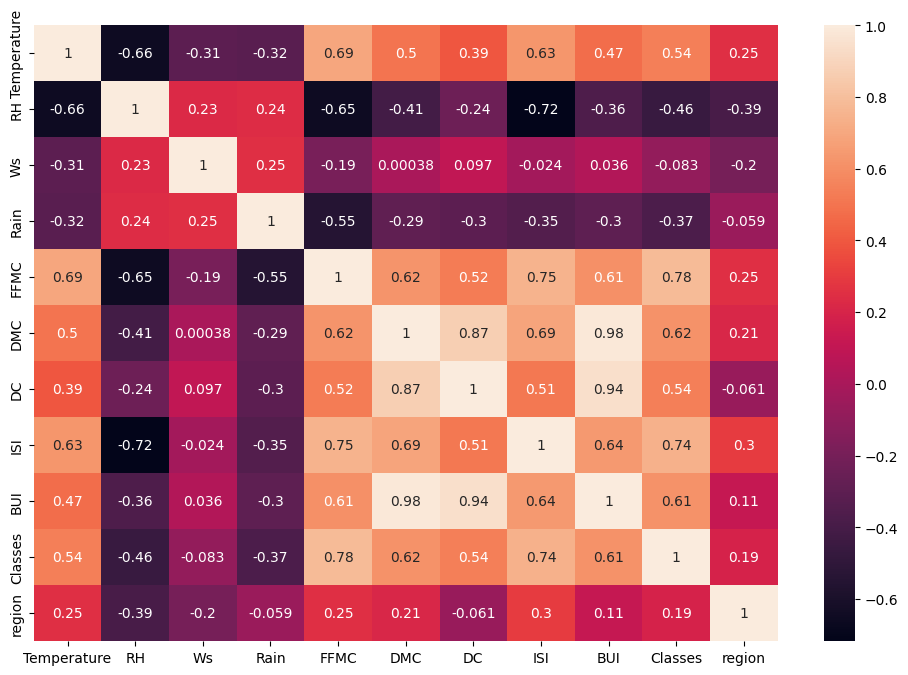

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True)

In [13]:
sets=correlation(X_train,0.85)

In [14]:
X_train.drop(sets,axis=1,inplace=True)   

In [15]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,1.8,0,0.0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,0.2,0,0.0
179,34,59,16,0.0,88.1,19.5,7.4,1,1.0


In [16]:
X_test.drop(sets,axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)


Text(0.5, 1.0, 'After Scaling')

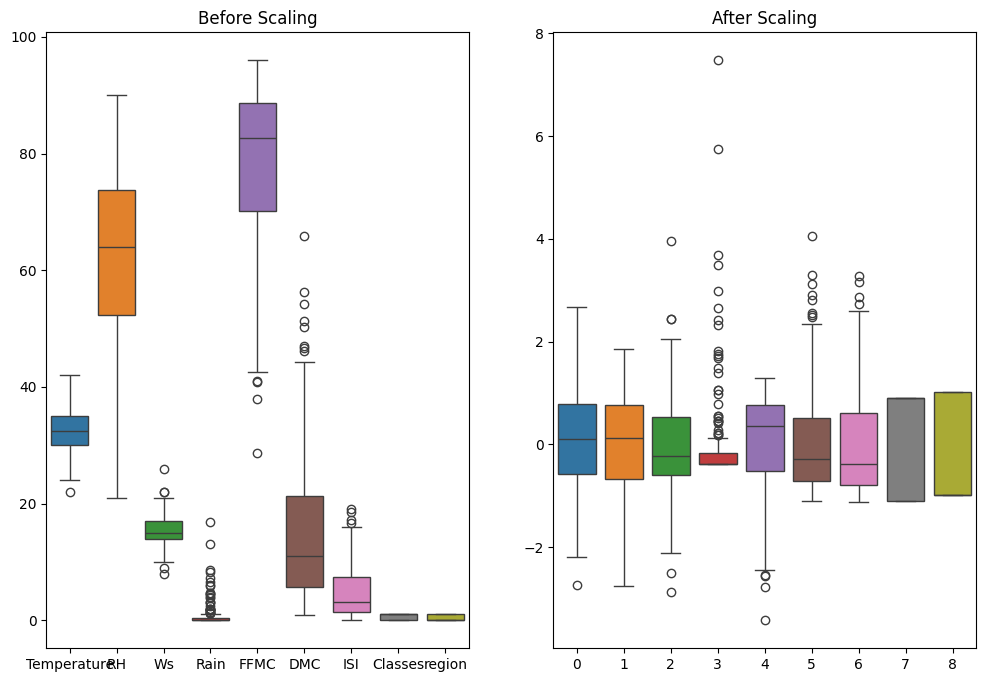

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")


Linear Regression


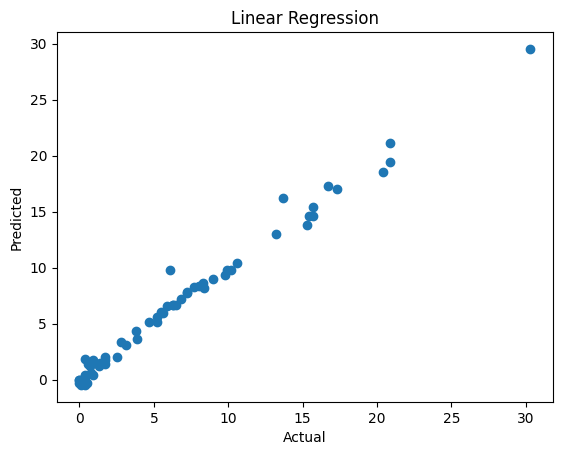

Mean Squared Error: 0.5468236465249978
R2 Score: 0.9847657384266951


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Lasso 

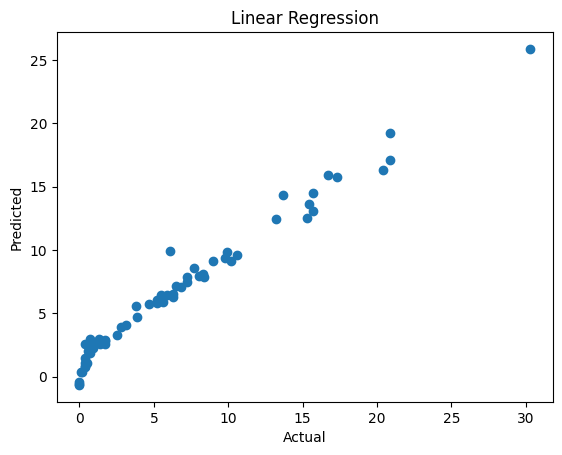

Mean Squared Error: 1.133175994914409
R2 Score: 0.9492020263112388


In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Lassocv

In [21]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [22]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [23]:
len(lassocv.alphas_)

100

In [24]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Text(0, 0.5, 'Predicted')

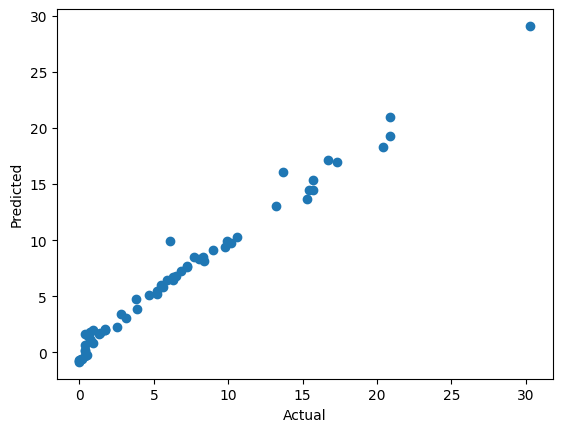

In [25]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [26]:
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))


Mean Squared Error: 0.619970115826343
R2 Score: 0.9820946715928275


Ridge regression

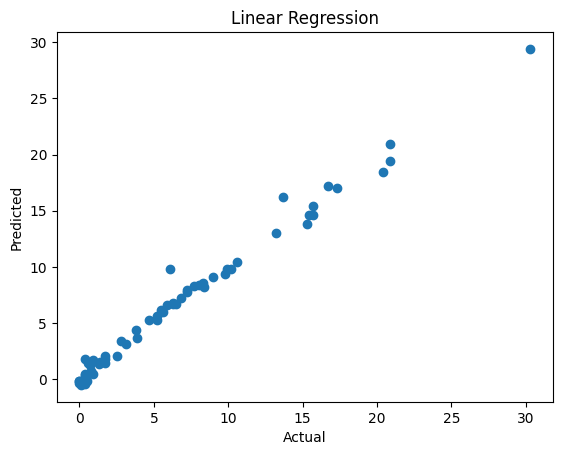

Mean Squared Error: 0.5642305340105715
R2 Score: 0.9842993364555512


In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Elastic Net

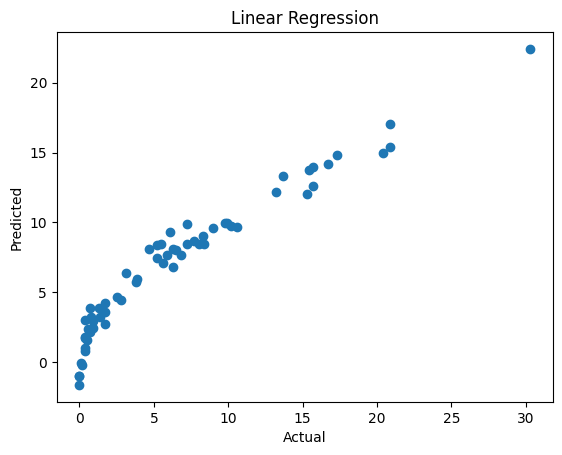

Mean Squared Error: 1.8822353634896005
R2 Score: 0.8753460589519703


In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

ridgeregressioncv

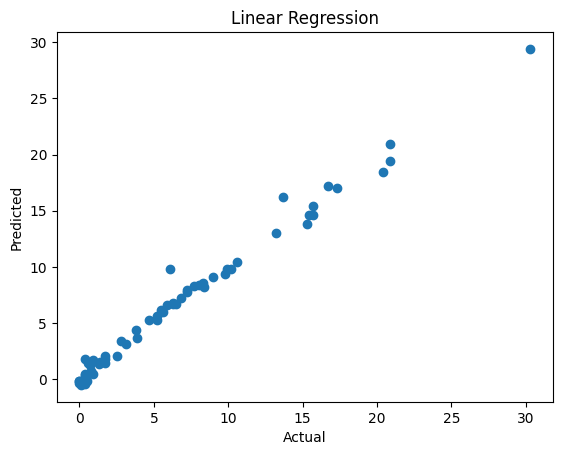

Mean Squared Error: 0.5642305340105715
R2 Score: 0.9842993364555512


In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
ridge=RidgeCV(cv=5)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

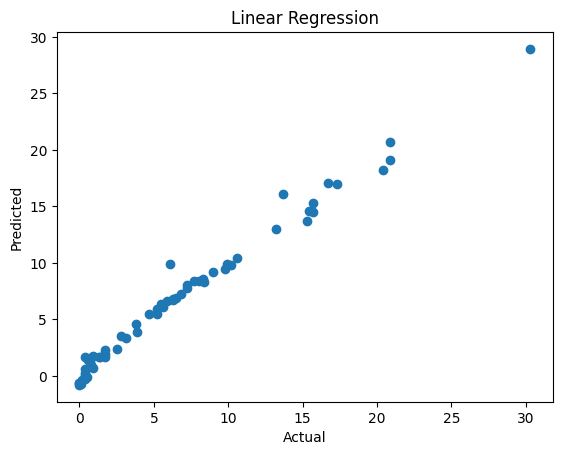

Mean Squared Error: 0.6575946731430898
R2 Score: 0.9814217587854941


In [31]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
elastic=ElasticNetCV()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()
print("Mean Squared Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

In [32]:
import pickle
pickle.dump(scalar, open('scalar.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))